# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
np.random.seed(2000)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "api.openweathermap.org/data/2.5/weather?"

weatherDict = {'City':[],
             'Latitude':[],
             'Longitude':[],
             'Max Temp':[],
             'Humidity':[],
             'Cloudiness':[],
             'Wind Speed':[],
              'Country':[]}

url = "http://api.openweathermap.org/data/2.5/weather?"

for city in cities:
    try:
        queryUrl = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        weatherResponse = requests.get(queryUrl)
        weatherJson = weatherResponse.json()
        cityLog  = weatherJson['name']
        cityId = weatherJson['id']
        weatherDict['City'].append(weatherJson['name'])
        weatherDict['Latitude'].append(weatherJson['coord']['lat'])
        weatherDict['Longitude'].append(weatherJson['coord']['lon'])
        weatherDict['Max Temp'].append(weatherJson['main']['temp_max'])
        weatherDict['Humidity'].append(weatherJson['main']['humidity'])
        weatherDict['Cloudiness'].append(weatherJson['clouds']['all'])
        weatherDict['Wind Speed'].append(weatherJson['wind']['speed'])
        weatherDict['Country'].append(weatherJson['sys']['country'])
        print(f'City name:{cityLog} ID: {cityId}')
    except KeyError:
        print('skipping city') 
        cities.remove(city)

City name:La Libertad ID: 3655131
City name:Guatire ID: 3639898
City name:Faanui ID: 4034551
City name:Ballina ID: 2177069
City name:Bambous Virieux ID: 1106677
City name:Juba ID: 373303
City name:Port Elizabeth ID: 964420
City name:Constitución ID: 3893726
City name:Tuatapere ID: 2180815
City name:East London ID: 1006984
City name:Bluff ID: 2206939
skipping city
City name:Rikitea ID: 4030556
City name:Bud ID: 4255151
City name:Cape Town ID: 3369157
City name:Punta Arenas ID: 3874787
City name:Carnot ID: 2387495
City name:Vilyuysk ID: 2013392
City name:Hong Kong ID: 1819729
City name:Grand Gaube ID: 934479
City name:Puerto Escondido ID: 3520994
City name:Lorengau ID: 2092164
City name:Hithadhoo ID: 1282256
City name:Cherskiy ID: 2126199
City name:Ushuaia ID: 3833367
City name:Bazarnye Mataki ID: 578467
City name:Jamestown ID: 5122534
City name:Mar del Plata ID: 3430863
City name:Severo-Kuril'sk ID: 2121385
City name:Tasiilaq ID: 3424607
City name:Qaanaaq ID: 3831208
City name:Kasongo-L

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df = pd.DataFrame.from_dict(weatherDict)

len(weather_df["City"])

weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,La Libertad,-2.23,-80.90,73.40,83,90,11.41,EC
1,Guatire,10.48,-66.54,84.20,79,20,2.24,VE
2,Faanui,-16.48,-151.75,78.12,75,18,24.25,PF
3,Ballina,-28.87,153.57,55.99,100,5,4.45,AU
4,Bambous Virieux,-20.34,57.76,66.99,88,40,5.82,MU


In [10]:
weather_df.to_csv("WeatherPy.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.

humidityOver100 = weather_df.loc[weather_df["Humidity"]> 100]

len(humidityOver100)


0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Y Plots

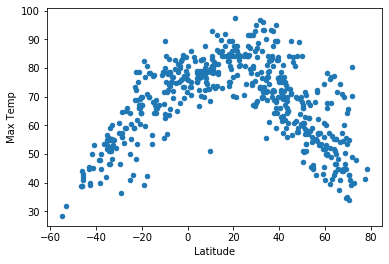

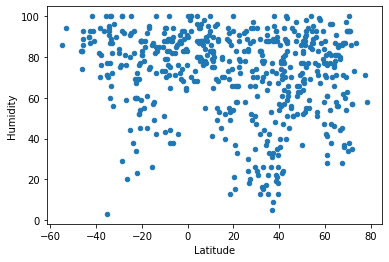

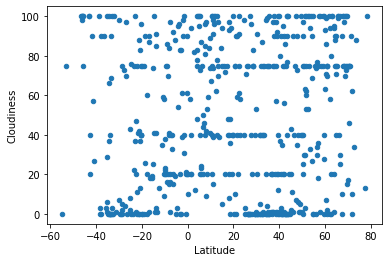

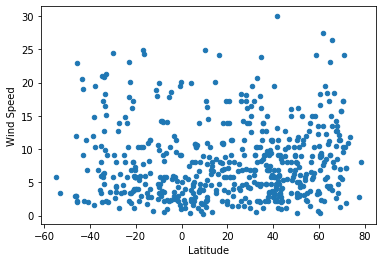

In [16]:
#Function
def mapping():
    
    list = ["Max Temp", "Humidity","Cloudiness", "Wind Speed" ]
    
    for value in list:
        
        weather_df.plot(kind="scatter", x = "Latitude", y = value)

mapping()



## Linear Regression

In [13]:
#Northern and Southern Hemipshere Data 

northernHemisphere = weather_df.loc[weather_df["Latitude"] > 0]
southernHemisphere = weather_df.loc[weather_df["Latitude"] < 0]

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

def linearRegression():
            
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regress_values, 'r-')
    plt.annotate(line_eq, (0.1,0.2), xycoords='axes fraction', fontsize = 12, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-squared is: {r_value**2}")
    plt.show()    


The r-squared is: 0.4918059607346548


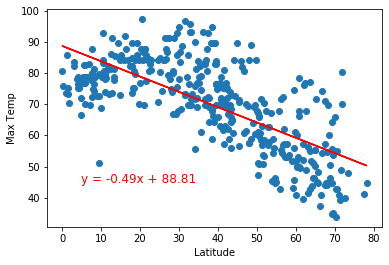

The r-squared is: 0.008481038159237854


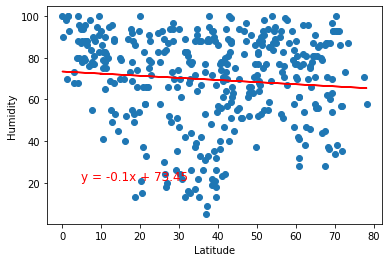

The r-squared is: 0.001941323603603056


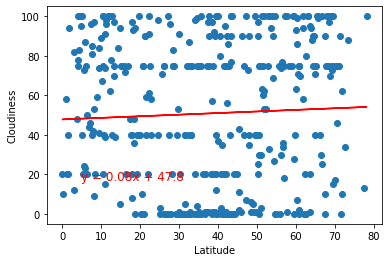

The r-squared is: 0.03208652092145526


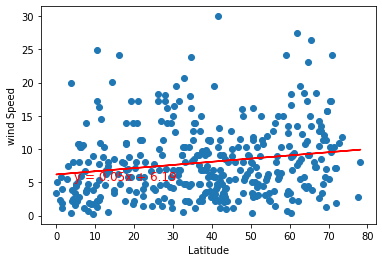

In [28]:
#Northern Hemipshere linear Regression Values
    
x = northernHemisphere["Latitude"]        
    
y = northernHemisphere["Max Temp"]
        
y_label = "Max Temp"

linearRegression()
        

x = northernHemisphere["Latitude"]
        
y = northernHemisphere["Humidity"]
        
y_label = "Humidity"

linearRegression()

x = northernHemisphere["Latitude"]
        
y = northernHemisphere["Cloudiness"]
        
y_label = "Cloudiness"

linearRegression()

x = northernHemisphere["Latitude"]
        
y = northernHemisphere["Wind Speed"]
        
y_label = "wind Speed"

linearRegression()


The r-squared is: 0.7012823623251117


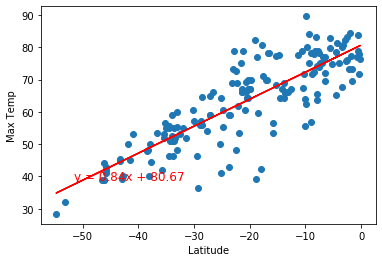

The r-squared is: 0.012941060710858187


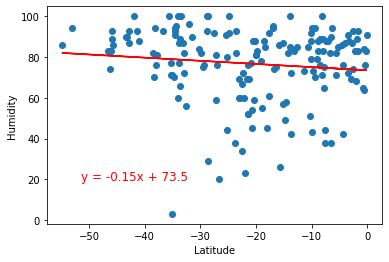

The r-squared is: 0.005911632231052974


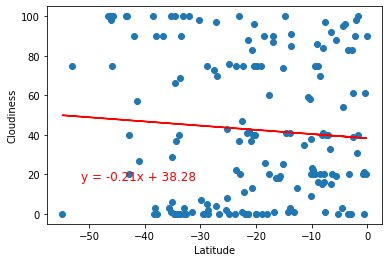

The r-squared is: 0.010106939277433925


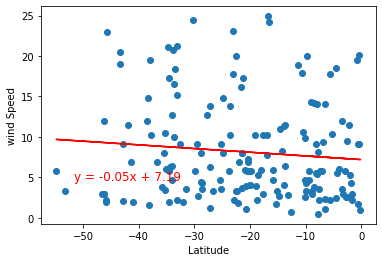

In [30]:
#Southern Hemipshere linear Regression Values
    
x = southernHemisphere["Latitude"]        
    
y = southernHemisphere["Max Temp"]
        
y_label = "Max Temp"

linearRegression()
        

x = southernHemisphere["Latitude"]
        
y = southernHemisphere["Humidity"]
        
y_label = "Humidity"

linearRegression()

x = southernHemisphere["Latitude"]
        
y = southernHemisphere["Cloudiness"]
        
y_label = "Cloudiness"

linearRegression()

x = southernHemisphere["Latitude"]
        
y = southernHemisphere["Wind Speed"]
        
y_label = "wind Speed"

linearRegression()